#Homework 5#

First, I had to aquire a completely new dataset, as my old one I suspect was actually a different 'Boise' (perhaps the city in Washington?) as it had much more rain than I would expect. My new dataset had a base accuracy of around 83%. I was able to raise this to 89% immediatley just by adding a second year of data to the dataset ("boise2.csv"). I also dropped some of the more redundant columns in my table that I don't think were contributing much to the dataset (maxTempC wasn't important, visibility was too similar to cloudcover, tempC was redundant). This brought up the accuracy by about a percent. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import requests
from wwo_hist import retrieve_hist_data

import os
print(os.listdir("C:/input"))
os.chdir("C:/input")


['boise.csv', 'boise2.csv']


In [2]:
#direct filepath to .csv will have to be edited to wherever .csv is on disk
rainData = pd.read_csv('C:/input/boise.csv')
rainData.sample(5)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,label
153,6/3/2018,30,15,0.0,14.5,6,59,12:41 AM,10:29 AM,6:05 AM,...,5,31,0.0,1014,30,10,124,11,83706,0
633,9/26/2019,25,11,0.0,11.6,5,2,4:41 AM,6:57 PM,7:37 AM,...,7,32,0.0,1011,25,10,235,9,83706,0
73,3/15/2018,7,2,0.0,10.2,2,2,7:18 AM,6:07 PM,7:57 AM,...,41,70,0.4,1009,7,10,290,8,83706,0
666,10/29/2019,1,-5,0.1,8.4,1,1,9:58 AM,8:05 PM,8:16 AM,...,24,41,0.2,1028,1,10,186,12,83706,0
217,8/6/2018,31,17,0.0,14.5,6,28,1:52 AM,4:40 PM,6:39 AM,...,1,24,0.0,1017,31,10,212,7,83706,0


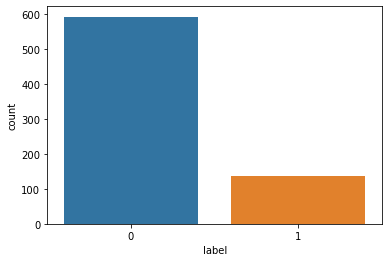

In [3]:
ax = sns.countplot(x="label", data=rainData)

In [4]:
feature_cols = ['mintempC', 'cloudcover', 'humidity','pressure']
X = rainData[feature_cols] # Features
y = rainData.label # Target variable

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.70, random_state=42)

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [7]:
X_test

,mintempC,cloudcover,humidity,pressure
468,6,79,64,1010
148,12,2,44,1011
302,2,11,60,1025
355,-4,26,68,1029
515,12,38,56,1015
...,...,...,...,...
36,1,20,65,1024
452,4,69,64,1023
139,14,51,52,1011
253,11,5,41,1010


In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9041095890410958


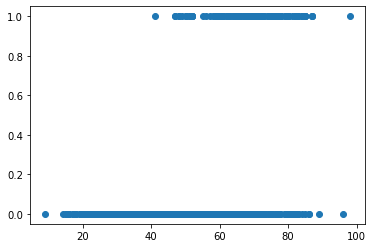

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X['humidity'],y)
plt.show()

[]

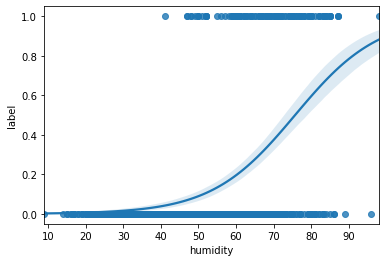

In [10]:
import seaborn as sns
sns.regplot(x = "humidity", y = "label", data=rainData, logistic = True)
plt.plot()

Text(0.5, 0, 'Importance')

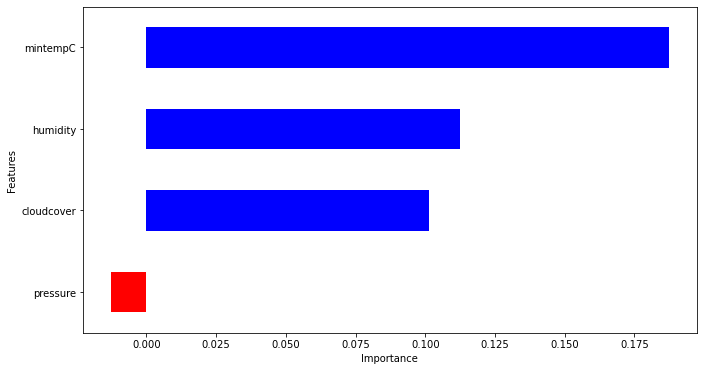

In [11]:
from matplotlib import pyplot as plt
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

frequency = 24
start_date = '1-JAN-2018'
end_date = '31-DEC-2018'
api_key = 'efbb9bbcd1e4494ea8600432201809'
location_list = ['83706']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)
                                
#Code I used for the API request, I installed a module called retrieve_hist_data that searches an api called world weather online 